In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time

In [29]:
def I_gap(i, big_V, big_G_gap):
    sum = 0
    for j in range(len(big_V)):
        sum += big_G_gap[i, j] * (big_V[i] - big_V[j])

    return sum

def I_syn(i, big_V, big_E, big_s, big_G_syn):
    sum = 0
    for j in range(len(big_V)):
        sum += big_G_syn[i, j] * big_s[j] * (big_V[i] - big_E[j])
    return sum

In [15]:
def I_leak(V_m):
    E_leak = -35 #mV
    G_leak = 10 #pS I think

    return G_leak * (V_m - E_leak)

In [16]:
def delta_V_m(V_m, I_leak, I_in):
    C_m = 1 #pF

    current_sum = -I_leak + I_in
    return current_sum / C_m

In [17]:
def start_sim(time_step, run_time, input_amount=50, in_start=0.4, in_end=0.6):
    input_current = 0
    
    # Set inital values
    V_m = -70
    t = 0

    # Storage
    V_m_array = []
    I_leak_array = []
    I_in_array = []
    time = []

    time_range = int(run_time / time_step)
    start_index = int(time_range * in_start)
    end_index = int(time_range * in_end)

    for i in range(time_range):
        if i == time_range // 4:
            print("25%")
        if i == time_range // 2:
            print("50%")
        if i == (time_range // 4) * 3:
            print("75%")

        if i == start_index:
            input_current = input_amount
        
        if i == end_index:
            input_current = 0

        # Time stuff
        time.append(t)
        t += time_step

        # Calculate
        leak_current = I_leak(V_m)
        d_V_m = delta_V_m(V_m, leak_current, input_current)
    
        #Update
        V_m += d_V_m * time_step
    
        #Store
        V_m_array.append(V_m)
        I_leak_array.append(leak_current)
        I_in_array.append(input_current)

    return [time, V_m_array ,I_leak_array, I_in_array]

In [18]:
def show_data(res, start=0, end=-1):
    plt.plot(res[0][start:end], res[1][start:end], label='V_m')
    plt.legend(loc='best')
    plt.show()
    plt.plot(res[0][start:end],res[2][start:end], label='I_leak')
    plt.plot(res[0][start:end],res[3][start:end], label='I_in')
    plt.legend(loc='best')
    plt.show()
    # Current by voltage
    plt.scatter(res[1][start:end:300],res[2][start:end:300], label='I_leak')
    plt.legend(loc='best')
    plt.show()

In [26]:
results = start_sim(0.0001, 1.5, in_start=0.3, in_end=0.7)

25%
50%
75%


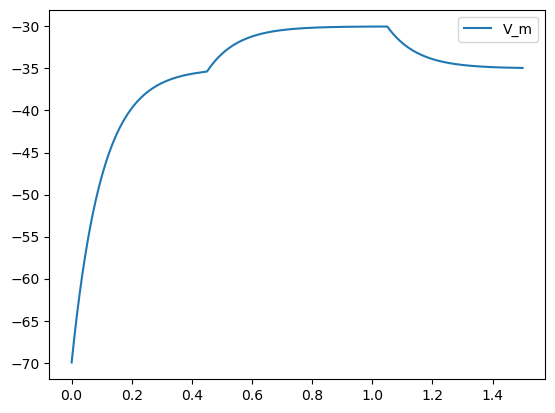

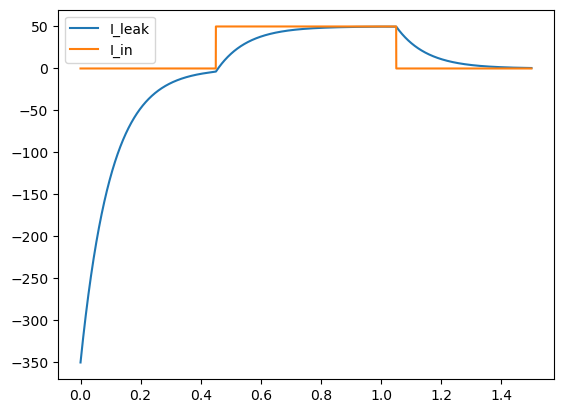

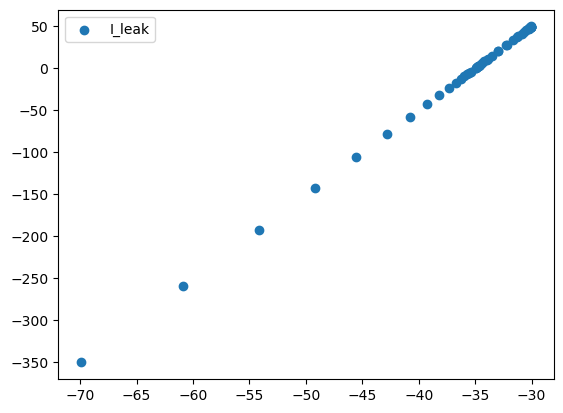

In [27]:
show_data(results)